In [1]:
from dummy_cluster import data_preprocess, dummy_cluster, get_cluster_class, get_class

In [2]:
data_path = '/home/santapo/OnlineLab/deep_clustering/data/label/test_'
flatten_images, all_labels = data_preprocess(data_path)
clusters = dummy_cluster(embb_vec=flatten_images)

100%|██████████| 7195/7195 [00:44<00:00, 162.90it/s]


In [3]:
ref_classes = get_cluster_class(all_labels, clusters)
predicted = get_class(ref_classes, clusters)

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
accuracy_score(predicted, all_labels)

0.3535788742182071

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [30]:
cm = confusion_matrix(all_labels, predicted)

In [12]:
os.getcwd()

'/home/santapo/OnlineLab/deep_clustering'

In [15]:
os.path.join(os.getcwd(), 'exps', 'h')

'/home/santapo/OnlineLab/deep_clustering/exps/h'

In [22]:
disp = ConfusionMatrixDisplay(cm,
                            display_labels=None)

In [23]:
disp.plot()

In [26]:
from matplotlib import pyplot as plt

plt.matshow(cm)
plt.savefig('confusion_matrix.jpg')

In [31]:
CLASS_ID = {
    'butterfly' : 0,
    'cat'       : 1,
    'dog'       : 2,
    'forest'    : 3,
    'lion'      : 4,
    'monkey'    : 5,
    'rose'      : 6,
    'sunflower' : 7
    }
    

In [41]:
predicted

array([1., 1., 3., ..., 2., 2., 2.])

In [39]:
label_list = list(CLASS_ID)
new_predicted = [label_list[int(i)] for i in predicted]

In [42]:
new_all_labels = [label_list[int(i)] for i in all_labels]

In [48]:
new_cm = confusion_matrix(new_all_labels, new_predicted, labels=label_list)

In [49]:
new_cm

array([[   0,   25,   48,   69,    0,    0,    0,    0],
       [   0,  981,  962,  455,    0,    0,    0,    0],
       [   0,  660, 1058,  360,    0,    0,    0,    0],
       [   0,  208,  410,  505,    0,    0,    0,    0],
       [   0,  138,  195,  136,    0,    0,    0,    0],
       [   0,   24,   43,  143,    0,    0,    0,    0],
       [   0,  137,  193,  116,    0,    0,    0,    0],
       [   0,   67,  182,   80,    0,    0,    0,    0]])

<ipython-input-59-bdf4fbc74a58>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+label_list)
<ipython-input-59-bdf4fbc74a58>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+label_list)


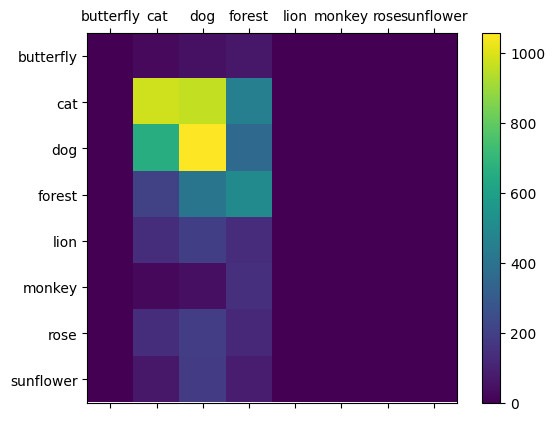

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(new_cm, interpolation='nearest')

ax.set_xticklabels(['']+label_list)
ax.set_yticklabels(['']+label_list)
fig.colorbar(cax)

plt.show()
fig.savefig('new.jpg')

In [61]:
import os
from tensorboardX import SummaryWriter
writer = SummaryWriter(os.path.join(os.getcwd(), 'exps', 'default'))
writer.add_figure(tag='confusion matrix', figure=fig, global_step=1)

In [64]:
import numpy as np
from typing import List
def plot_fig(confusion_matrix: np.ndarray,
            class_name: List[str]) -> plt.figure:

    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(confusion_matrix, interpolation='nearest')

    ax.set_xticklabels(['']+class_name)
    ax.set_yticklabels(['']+class_name)
    fig.colorbar(cax)

    return fig

In [65]:
fig = plot_fig(cm, label_list)

<ipython-input-64-7ad954c95b6f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+class_name)
<ipython-input-64-7ad954c95b6f>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+class_name)


In [66]:
plt.savefig('new.jpg')